In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
data = pd.read_csv('housePrice.csv')
data.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [16]:
data.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


In [17]:
data['Area'] = pd.to_numeric(data['Area'], errors='coerce')
data['Room'] = pd.to_numeric(data['Room'], errors='coerce')
mask = {
    "True": 1,
    "False": 0,
    True: 1,
    False: 0
}
data['Parking'] = data['Parking'].map(mask)
data['Warehouse'] = data['Warehouse'].map(mask, na_action=None)
data['Elevator'] = data['Elevator'].map(mask, na_action=None)
data = data.dropna()

In [18]:
data.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,1,1,1,Shahran,1.850000e+09,61666.67
1,60.0,1,1,1,1,Shahran,1.850000e+09,61666.67
2,79.0,2,1,1,1,Pardis,5.500000e+08,18333.33
3,95.0,2,1,1,1,Shahrake Qods,9.025000e+08,30083.33
4,123.0,2,1,1,1,Shahrake Gharb,7.000000e+09,233333.33


In [19]:
data.describe()

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
count,3450.000000,3450.000000,3450.000000,3450.000000,3450.000000,3.450000e+03,3.450000e+03
mean,106.917391,2.081159,0.847536,0.915072,0.787536,5.375563e+09,1.791854e+05
std,69.550976,0.760216,0.359522,0.278814,0.409111,8.125918e+09,2.708639e+05
min,30.000000,0.000000,0.000000,0.000000,0.000000,3.600000e+06,1.200000e+02
25%,69.000000,2.000000,1.000000,1.000000,1.000000,1.419250e+09,4.730833e+04
50%,90.000000,2.000000,1.000000,1.000000,1.000000,2.900000e+09,9.666667e+04
75%,120.000000,2.000000,1.000000,1.000000,1.000000,6.000000e+09,2.000000e+05
max,929.000000,5.000000,1.000000,1.000000,1.000000,9.240000e+10,3.080000e+06


[]

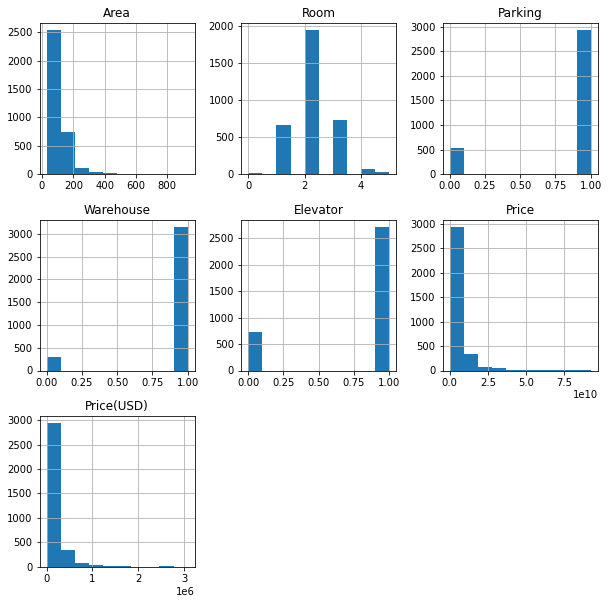

In [20]:
data.hist(figsize=(10, 10))
plt.plot()

In [21]:
from sklearn.model_selection import train_test_split

X = data[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator']]
Y = data[['Price(USD)']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("x train count", len(X_train))
print("y train count", len(y_train))
print("x test count", len(X_test))
print("y test count", len(y_test))

x train count 2760
y train count 2760
x test count 690
y test count 690


In [22]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
print("coef:", reg.coef_)
print("intercept:", reg.intercept_)

coef: [[ 2423.59287145 45005.85863324 -9165.62148288 44676.19007417
  33319.60050205]]
intercept: [-233672.80746583]


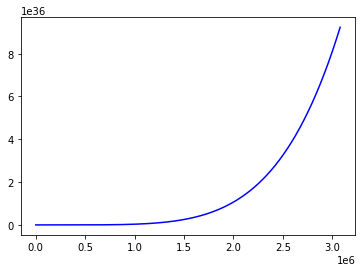

In [23]:
x = np.arange(min(data['Price(USD)']), max(data['Price(USD)']), 0.1)
y = reg.intercept_[0] + reg.coef_[0][0] * x + reg.coef_[0][1] * pow(x, 2) + \
    reg.coef_[0][2] * pow(x, 3) + reg.coef_[0][3] * pow(x, 4) + reg.coef_[0][4] * pow(x, 5)
plt.plot(x, y, color='blue')
plt.show()

In [24]:
from sklearn.metrics import r2_score
y_test_ = reg.predict(X_test)
score = r2_score(y_test, y_test_)
print("score:", score)

score: 0.5319739993784479
